# 1. Load dataset
#### For this programming assignment, you are provided with a dataset of handwritten letters and expected to build a CNN model that classifies given image into one of the pre-defined 28 categories. The dataset is provided in two files: train and test sets.
#### You will need to read the data from data files (HandChars32_150_Train.txt and HandChars32_50_Test.txt). The columns are separated by “#” sign. See the description of the columns below:
- PatN – index (label) of image
- PatType – written form of the letter
- PatProb - coefficient of correctness of writing the prototype [0, .., 10].
- SizeH, SizeW – height and width of the image, respectively
- Data – pixels of the grayscale image
#### For building CNN model, you will need to use PatN and Data columns.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/DISC_D:\/ARTI/DSCTP_2022_1_ML_CNN/' # For Google colab

In [ ]:
path = '' # for PC

In [ ]:
train = pd.read_csv(path+'HandChars32_150_Train.txt', sep="#")

In [ ]:
train.head()

,PatN,PatType,PatProb,SizeH,SizeW,Data
0,0,0,10,32,32,0000000000000001100000000000000000000000000000...
1,0,0,10,32,32,0000000000000000001000000000000000000000000000...
2,0,0,10,32,32,0000000000000000000010000000000000000000000000...
3,0,0,10,32,32,0000000000000000000010000000000000000000000000...
4,0,0,9,32,32,0000000000000000000001100000000000000000000000...


In [ ]:
len(train)

4200

In [ ]:
train['PatType'].unique()

array([0])

In [ ]:
test = pd.read_csv(path+'HandChars32_50_Test.txt', sep="#")

In [ ]:
test['PatType'].unique()

array([0, 1, 2, 3])

# 2. Visualization
#### Visualize some sample images from both train and test sets.

In [ ]:
def to_img(df, i):
  tmp = df['Data'].apply(lambda df: np.array(list(map(int,list(df)))))
  tmp = np.array(tmp)
  return tmp[i].reshape(df.iloc[i]['SizeH'], df.iloc[i]['SizeW'])

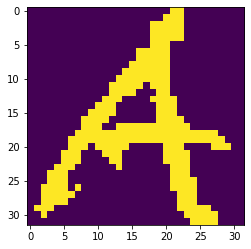

In [ ]:
plt.imshow(to_img(train, 4))
plt.show()

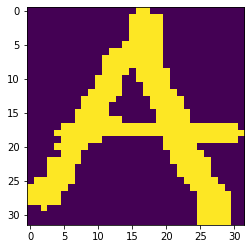

In [ ]:
plt.imshow(to_img(test, 2))
plt.show()

# 3. Modeling
#### You are expected to build a convolutional neural network and:
- Train it on the training data
- Perform hyperparameter tuning if needed
- Experiment with different designs (layers, layer units, convolutional layers, pooling layers, filters, filter sizes, padding, epochs, etc.)
- Evaluate the model using test set
- Achieve test accuracy of ~85%
#### You are expected to use tensorflow library. You may need to install it first.
#### You will be using Sequential module from tensoflow.keras. For an example of Sequential model, see the "Tackling Fashion MNIST With a CNN" section of the following notebook:
https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb
#### You can start with a simple neural network and add convolution and pooling layers as needed.
#### You can choose RMSprop as optimizer, categorical crossentropy as loss, and accuracy as metric.
#### Experiment with different settings.

In [ ]:
def str_to_arr(x):
  x = x.apply(lambda d: np.array(list(map(int,list(d)))))
  x = x.apply(lambda d: d.reshape(32, 32, 1))
  x = np.stack(x.tolist())
  return x

In [ ]:
def to_category(y):
  y = np.array(y)
  y = keras.utils.to_categorical(y)
  return y

In [ ]:
x_train = str_to_arr(train['Data'])
x_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
x_train.shape

(4200, 32, 32, 1)

In [ ]:
y_train = to_category(train['PatN'])
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
x_test = str_to_arr(test['Data'])
x_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [1],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [1],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [1],
         [0],
         [0]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [0],


In [ ]:
y_test = to_category(test['PatN'])
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
input_layer_size = x_train[0].shape
input_layer_size

(32, 32, 1)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=list(input_layer_size), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=28, activation='softmax'),
])

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                        

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
132/132 [==============================] - 29s 210ms/step - loss: 2.0497 - accuracy: 0.4233 - val_loss: 1.3711 - val_accuracy: 0.6357
Epoch 2/20
132/132 [==============================] - 28s 212ms/step - loss: 0.9048 - accuracy: 0.7360 - val_loss: 0.9216 - val_accuracy: 0.7429
Epoch 3/20
132/132 [==============================] - 26s 195ms/step - loss: 0.5775 - accuracy: 0.8260 - val_loss: 0.9053 - val_accuracy: 0.7821
Epoch 4/20
132/132 [==============================] - 28s 210ms/step - loss: 0.4183 - accuracy: 0.8736 - val_loss: 0.7545 - val_accuracy: 0.8164
Epoch 5/20
132/132 [==============================] - 26s 198ms/step - loss: 0.3198 - accuracy: 0.9040 - val_loss: 0.7546 - val_accuracy: 0.8200
Epoch 6/20
132/132 [==============================] - 26s 198ms/step - loss: 0.2644 - accuracy: 0.9200 - val_loss: 0.7669 - val_accuracy: 0.8250
Epoch 7/20
132/132 [==============================] - 26s 197ms/step - loss: 0.2127 - accuracy: 0.9336 - val_loss: 1.0417 - val_ac

#### Perform error analysis to find out what might boost your test accuracy. You are expected to analyze the data closely. You should achieve ~90% test accuracy.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


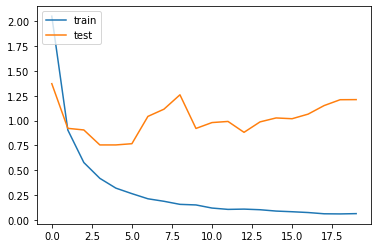

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

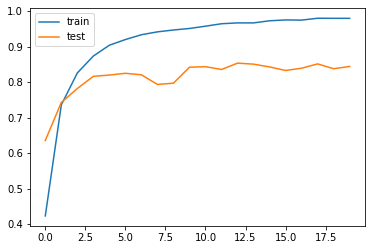

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predict = model.predict(x_test)

In [ ]:
predict.shape

(1400, 28)

In [ ]:
y_test.shape

(1400, 28)

In [ ]:
predict = np.argmax(predict, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
conf_matx = confusion_matrix(y_test, predict)

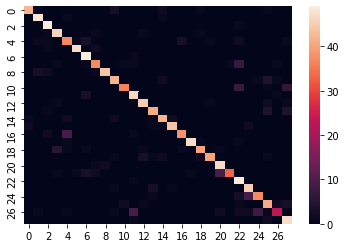

In [ ]:
sns.heatmap(conf_matx)
plt.show()

In [ ]:
conf_matx[16][4]

9

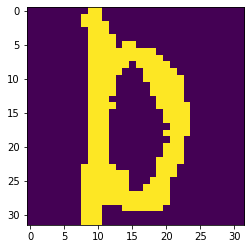

In [ ]:
plt.imshow(to_img(train[train['PatN']==4], 0))
plt.show() # Dd

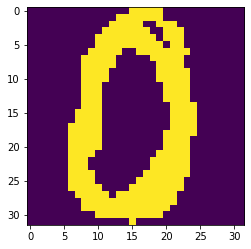

In [ ]:
plt.imshow(to_img(train[train['PatN']==16], 0))
plt.show() # Oo

In [ ]:
conf_matx[26][26] # So low

23

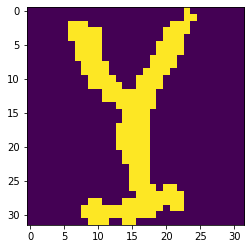

In [ ]:
plt.imshow(to_img(train[train['PatN']==26], 0))
plt.show() # Yy

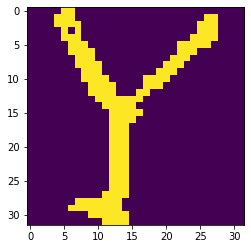

In [ ]:
plt.imshow(to_img(train[train['PatN']==26], 4))
plt.show() # Yy

In [ ]:
conf_matx[26][24]

8

In [ ]:
conf_matx[26][23]

2

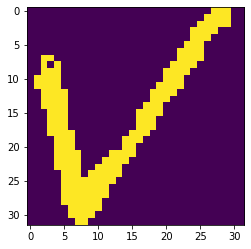

In [ ]:
plt.imshow(to_img(train[train['PatN']==24], 4))
plt.show() # Xx

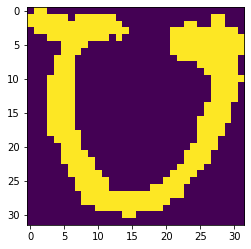

In [ ]:
plt.imshow(to_img(train[train['PatN']==23], 4))
plt.show() # Ww

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


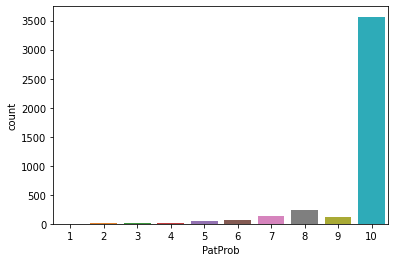

In [ ]:
sns.countplot(train['PatProb'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


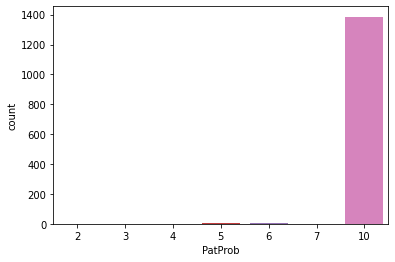

In [ ]:
sns.countplot(test['PatProb'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


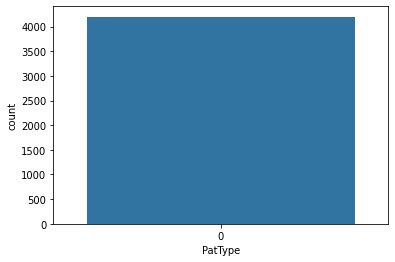

In [ ]:
sns.countplot(train['PatType'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


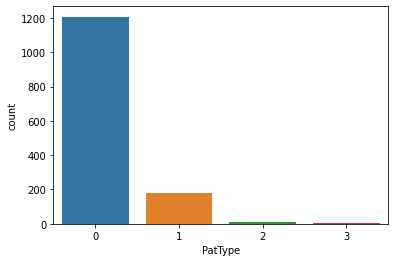

In [ ]:
sns.countplot(test['PatType'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


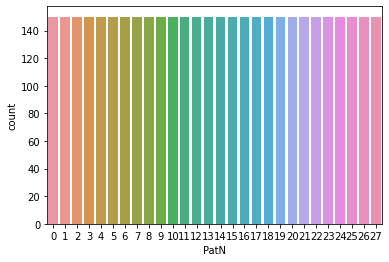

In [ ]:
sns.countplot(train['PatN'])
plt.show()

In [ ]:
test[test['PatType']>0].describe()

,PatN,PatType,PatProb,SizeH,SizeW
count,193.000000,193.000000,193.000000,193.0,193.0
mean,17.031088,1.067358,9.683938,32.0,32.0
std,8.778470,0.289795,1.278264,0.0,0.0
min,4.000000,1.000000,2.000000,32.0,32.0
25%,9.000000,1.000000,10.000000,32.0,32.0
50%,22.000000,1.000000,10.000000,32.0,32.0
75%,26.000000,1.000000,10.000000,32.0,32.0
max,27.000000,3.000000,10.000000,32.0,32.0


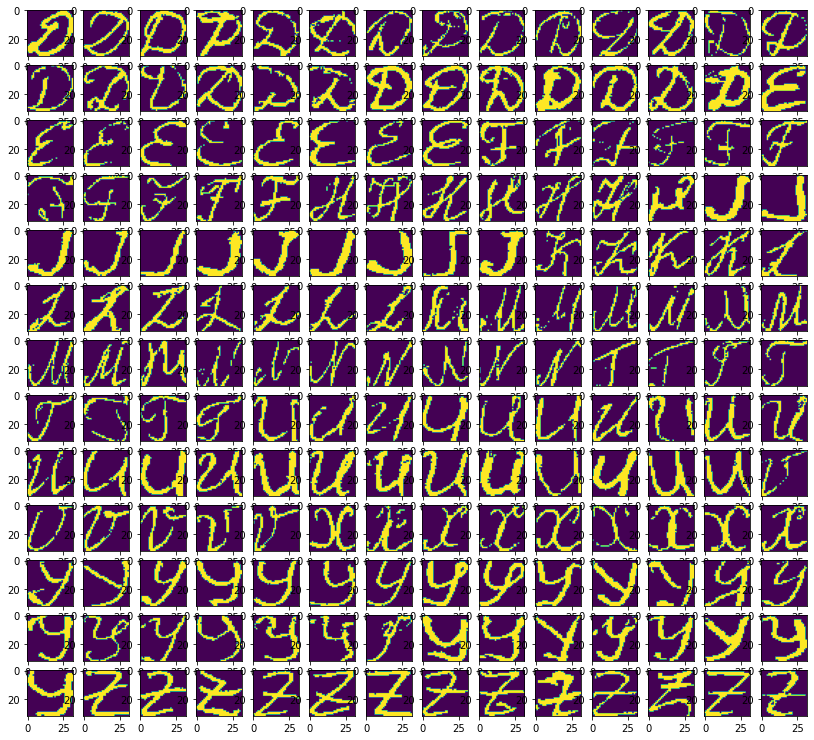

In [ ]:
n1 = len(test[test['PatType']==1])
col_rows1 = int(np.ceil(np.sqrt(n1)))
f1 = plt.figure(figsize=(col_rows1, col_rows1))

for i in range(1, n1+1):
  f1.add_subplot(col_rows1, col_rows1, i)
  plt.imshow(to_img(test[test['PatType']==1], i-1))

plt.show()

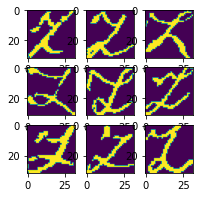

In [ ]:
n2 = len(test[test['PatType']==2])
col_rows2 = int(np.ceil(np.sqrt(n2)))
f2 = plt.figure(figsize=(col_rows2, col_rows2))

for i in range(1, n2+1):
  f2.add_subplot(col_rows2, col_rows2, i)
  plt.imshow(to_img(test[test['PatType']==2], i-1))

plt.show()

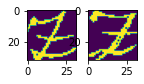

In [ ]:
n3 = len(test[test['PatType']==3])
col_rows3 = int(np.ceil(np.sqrt(n3)))
f3 = plt.figure(figsize=(col_rows3, col_rows3))

for i in range(1, n3+1):
  f3.add_subplot(col_rows3, col_rows3, i)
  plt.imshow(to_img(test[test['PatType']==3], i-1))

plt.show()

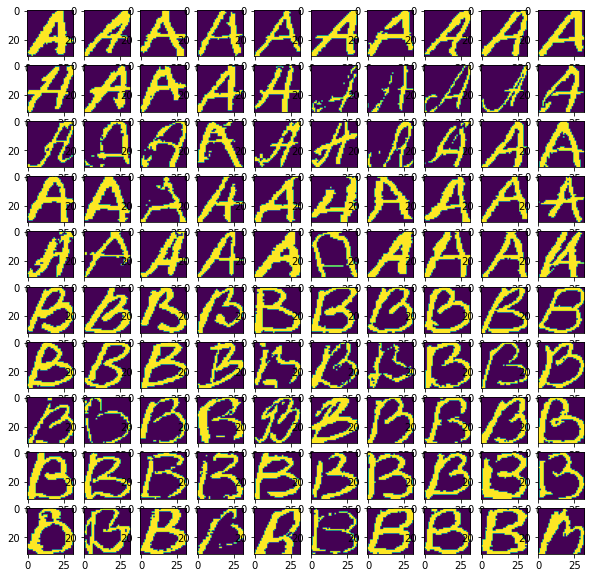

In [ ]:
n0 = 100
col_rows0 = 10
f0 = plt.figure(figsize=(col_rows0, col_rows0))

for i in range(1, n0+1):
  f0.add_subplot(col_rows0, col_rows0, i)
  plt.imshow(to_img(test[test['PatType']==0], i-1))

plt.show()

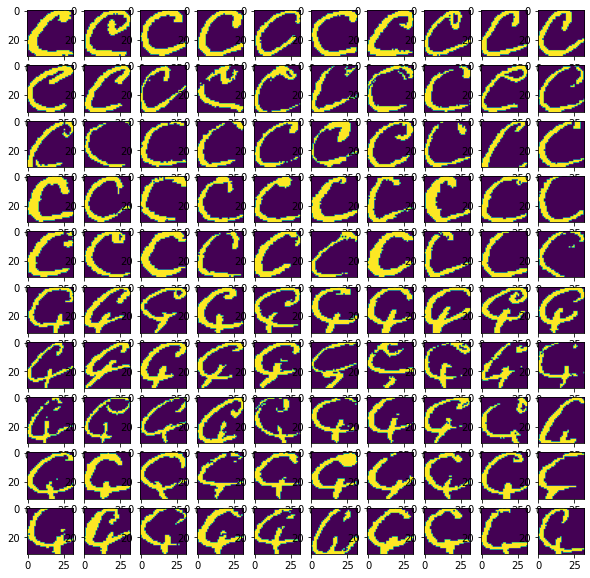

In [ ]:
n0 = 100
col_rows0 = 10
f0 = plt.figure(figsize=(col_rows0, col_rows0))
margin = 100

for i in range(1+margin, n0+1+margin):
  f0.add_subplot(col_rows0, col_rows0, i-margin)
  plt.imshow(to_img(test[test['PatType']==0], i-1))

plt.show()

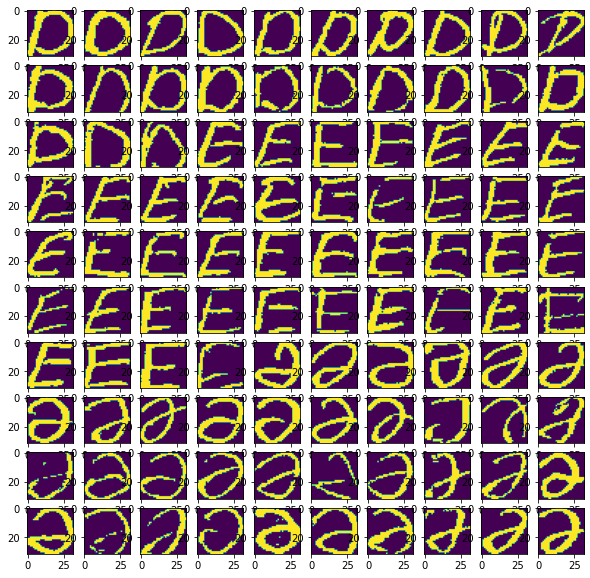

In [ ]:
n0 = 100
col_rows0 = 10
f0 = plt.figure(figsize=(col_rows0, col_rows0))
margin = 200

for i in range(1+margin, n0+1+margin):
  f0.add_subplot(col_rows0, col_rows0, i-margin)
  plt.imshow(to_img(test[test['PatType']==0], i-1))

plt.show()

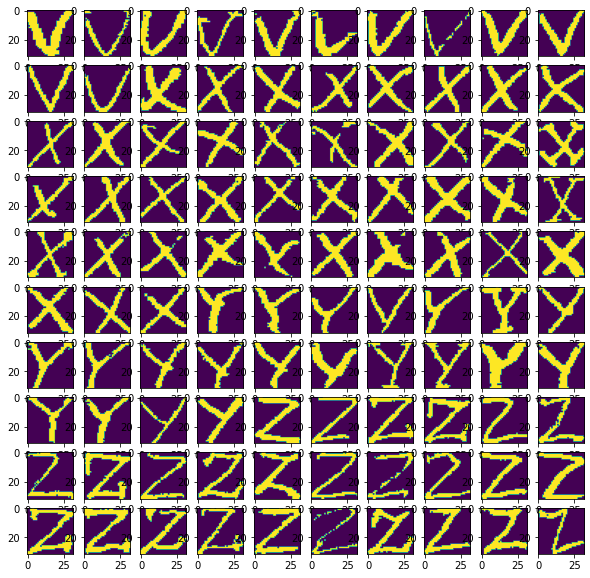

In [ ]:
n0 = 100
col_rows0 = 10
f0 = plt.figure(figsize=(col_rows0, col_rows0))
margin = -100

for i in range(1+margin, n0+1+margin):
  f0.add_subplot(col_rows0, col_rows0, i-margin)
  plt.imshow(to_img(test[test['PatType']==0], i-1))

plt.show()

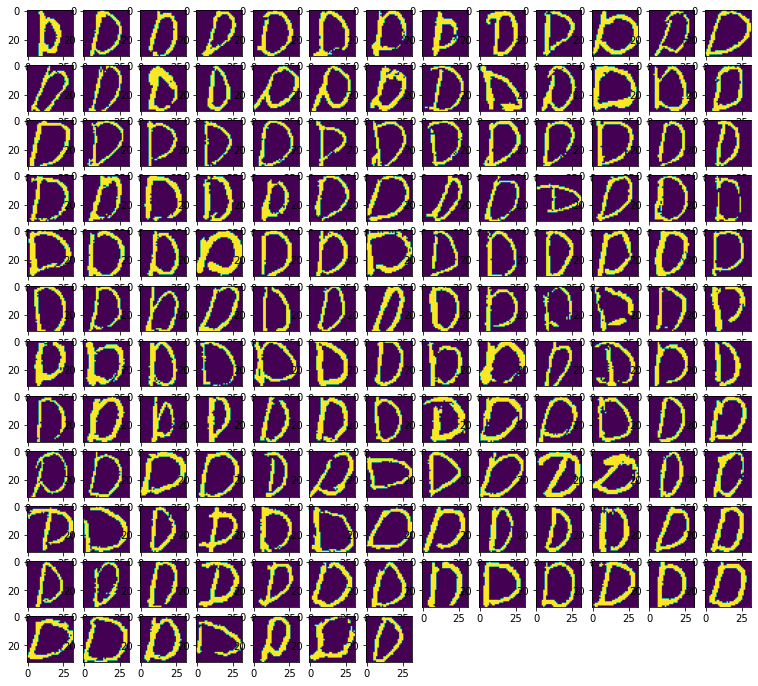

In [ ]:
nD = len(train[train['PatN']==4])
col_rowsD = int(np.ceil(np.sqrt(nD)))
fD = plt.figure(figsize=(col_rowsD, col_rowsD))
margin = 0

for i in range(1+margin, nD+1+margin):
  fD.add_subplot(col_rowsD, col_rowsD, i-margin)
  plt.imshow(to_img(train[train['PatN']==4], i-1))

plt.show()

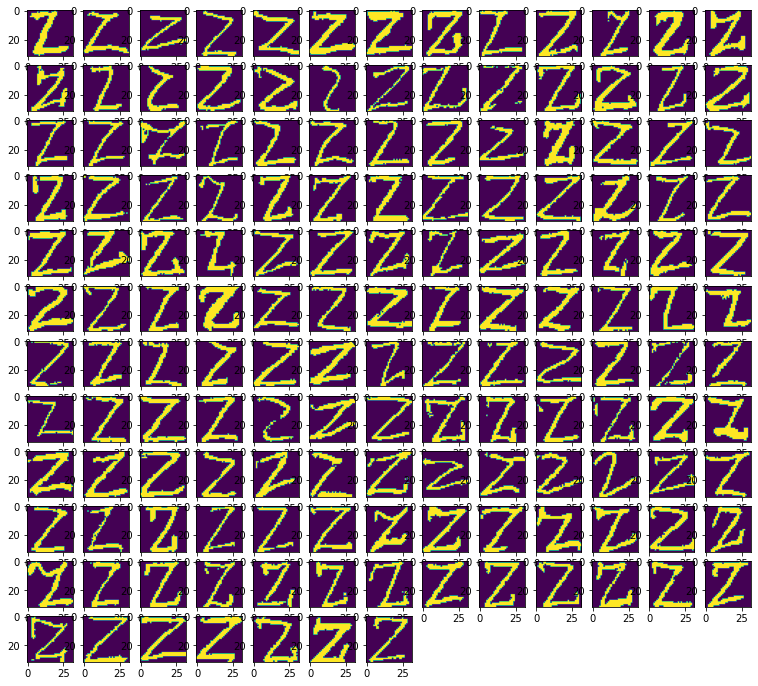

In [ ]:
nZ = len(train[train['PatN']==27])
col_rowsZ = int(np.ceil(np.sqrt(nZ)))
fZ = plt.figure(figsize=(col_rowsZ, col_rowsZ))
margin = 0

for i in range(1+margin, nZ+1+margin):
  fZ.add_subplot(col_rowsZ, col_rowsZ, i-margin)
  plt.imshow(to_img(train[train['PatN']==27], i-1))

plt.show()

In [ ]:
dataX = pd.concat([train, test], ignore_index=True)
dataX

,PatN,PatType,PatProb,SizeH,SizeW,Data
0,0,0,10,32,32,0000000000000001100000000000000000000000000000...
1,0,0,10,32,32,0000000000000000001000000000000000000000000000...
2,0,0,10,32,32,0000000000000000000010000000000000000000000000...
3,0,0,10,32,32,0000000000000000000010000000000000000000000000...
4,0,0,9,32,32,0000000000000000000001100000000000000000000000...
...,...,...,...,...,...,...
5595,27,1,10,32,32,0000000000000000110000000000000000000000000000...
5596,27,1,10,32,32,0000000000011111000000000000000000000000011111...
5597,27,1,10,32,32,0000000000000000000000000001110000000000000000...
5598,27,1,10,32,32,0001000000000000000000000000000000111111111111...


In [ ]:
dataY = dataX['PatN']
dataX = dataX.drop(columns=['PatN'])
dataY, dataX

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 5595    27
 5596    27
 5597    27
 5598    27
 5599    27
 Name: PatN, Length: 5600, dtype: int64,
       PatType  PatProb  SizeH  SizeW  \
 0           0       10     32     32   
 1           0       10     32     32   
 2           0       10     32     32   
 3           0       10     32     32   
 4           0        9     32     32   
 ...       ...      ...    ...    ...   
 5595        1       10     32     32   
 5596        1       10     32     32   
 5597        1       10     32     32   
 5598        1       10     32     32   
 5599        1       10     32     32   
 
                                                    Data  
 0     0000000000000001100000000000000000000000000000...  
 1     0000000000000000001000000000000000000000000000...  
 2     0000000000000000000010000000000000000000000000...  
 3     0000000000000000000010000000000000000000000000...  
 4     0000000000000000000001100000000

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, train_size=0.75)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


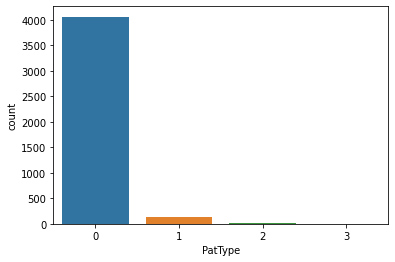

In [ ]:
sns.countplot(x_train['PatType'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


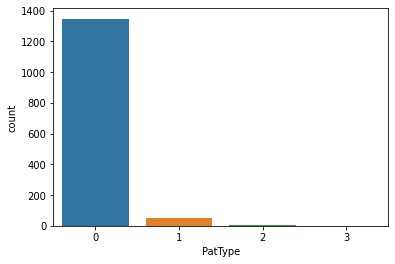

In [ ]:
sns.countplot(x_test['PatType'])

In [ ]:
xtr = str_to_arr(x_train['Data'])
xts = str_to_arr(x_test['Data'])

In [ ]:
ytr = to_category(y_train)
yts = to_category(y_test)

In [ ]:
input_layer_size = xtr[0].shape
input_layer_size

(32, 32, 1)

In [1]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=list(input_layer_size), activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=28, activation='softmax'),
])

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

model.summary()

NameError: name 'keras' is not defined

In [ ]:
history = model.fit(xtr, ytr, epochs=20, validation_data=(xts, yts))

Epoch 1/20
132/132 [==============================] - 31s 228ms/step - loss: 2.1722 - accuracy: 0.3748 - val_loss: 0.7702 - val_accuracy: 0.7986
Epoch 2/20
132/132 [==============================] - 32s 243ms/step - loss: 0.9533 - accuracy: 0.7190 - val_loss: 0.4879 - val_accuracy: 0.8750
Epoch 3/20
132/132 [==============================] - 30s 228ms/step - loss: 0.6309 - accuracy: 0.8086 - val_loss: 0.3786 - val_accuracy: 0.9043
Epoch 4/20
132/132 [==============================] - 32s 246ms/step - loss: 0.4750 - accuracy: 0.8526 - val_loss: 0.3129 - val_accuracy: 0.9129
Epoch 5/20
132/132 [==============================] - 32s 241ms/step - loss: 0.3612 - accuracy: 0.8893 - val_loss: 0.3008 - val_accuracy: 0.9164
Epoch 6/20
132/132 [==============================] - 30s 227ms/step - loss: 0.3115 - accuracy: 0.9043 - val_loss: 0.3009 - val_accuracy: 0.9257
Epoch 7/20
132/132 [==============================] - 30s 225ms/step - loss: 0.2555 - accuracy: 0.9143 - val_loss: 0.2876 - val_ac

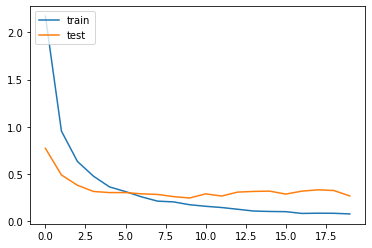

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

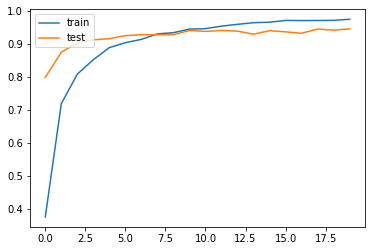

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()